In [1]:
import pickle
import numpy as np
from pathlib import Path
import covid19sim
from collections import defaultdict

import datetime
from collections import defaultdict, Counter
from copy import deepcopy

In [2]:

filenames = [
"/Users/xxx/Documents/covid/simulator/src/covid19sim/output/sim_v2_people-100_days-22_init-0.001_seed-0_'20200522-182622/"
    + "tracker_data_n_100_seed_0_20200522-183902_.pkl"
]
for i, filename in enumerate(filenames):
    with open(filename, "rb") as f:
        data = pickle.load(f)
print(data.keys())
print("gaen keys:")
print(data["gaen"].keys())
gaen = data["gaen"]["update"]

hgaen = defaultdict(list)
for u in gaen:
    hgaen[u["name"]].append(u)
ra = data["risk_attributes"]
hra = defaultdict(list)
for r in ra:
    hra[r["name"]].append(r)

dict_keys(['intervention_day', 'intervention', 'risk_model', 'expected_mobility', 'serial_interval', 'mobility', 'n_init_infected', 'contacts', 'cases_per_day', 'ei_per_day', 'r_0', 'R', 'n_humans', 's', 'e', 'i', 'r', 'avg_infectiousness_per_day', 'risk_precision_global', 'risk_precision', 'human_monitor', 'infection_monitor', 'infector_infectee_update_messages', 'risk_attributes', 'feelings', 'rec_feelings', 'outside_daily_contacts', 'test_monitor', 'gaen'])
gaen keys:
dict_keys(['update'])


Some stats:
Number of events                        : 126
Total number of individuals             : 100
Number humans sending messages          : 89


<IPython.core.display.Javascript object>


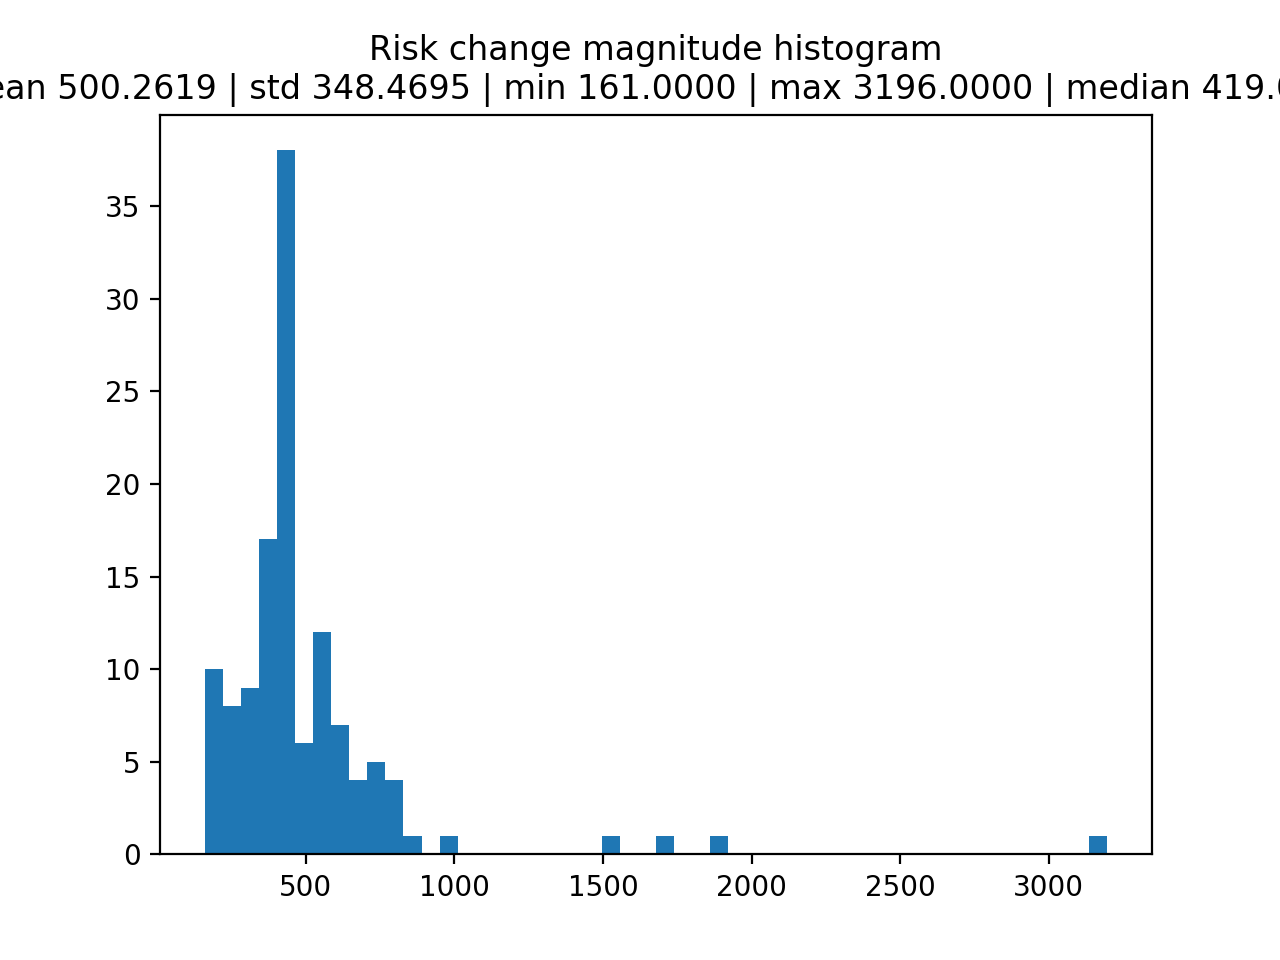

<IPython.core.display.Javascript object>


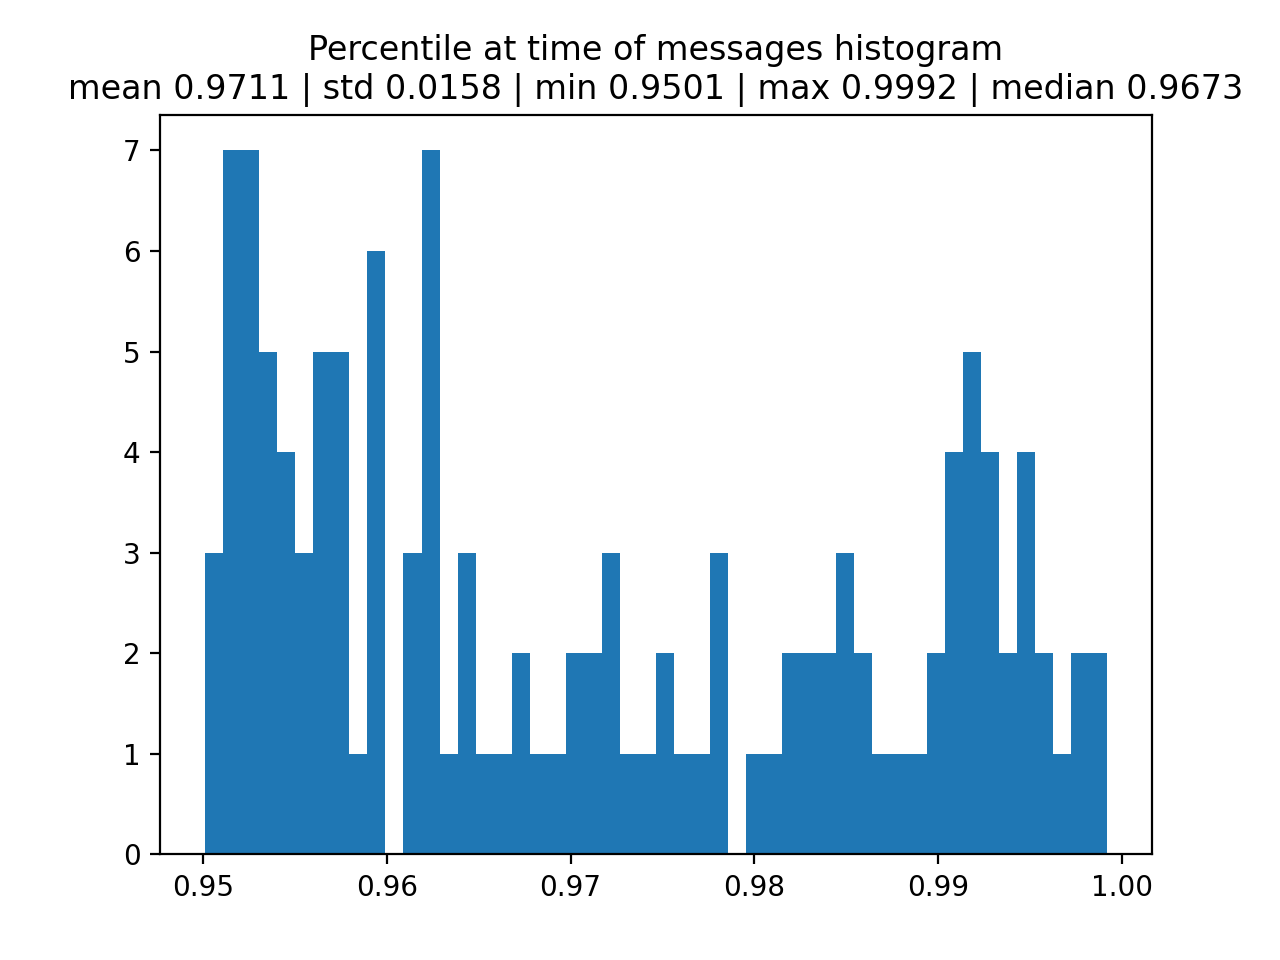

<IPython.core.display.Javascript object>


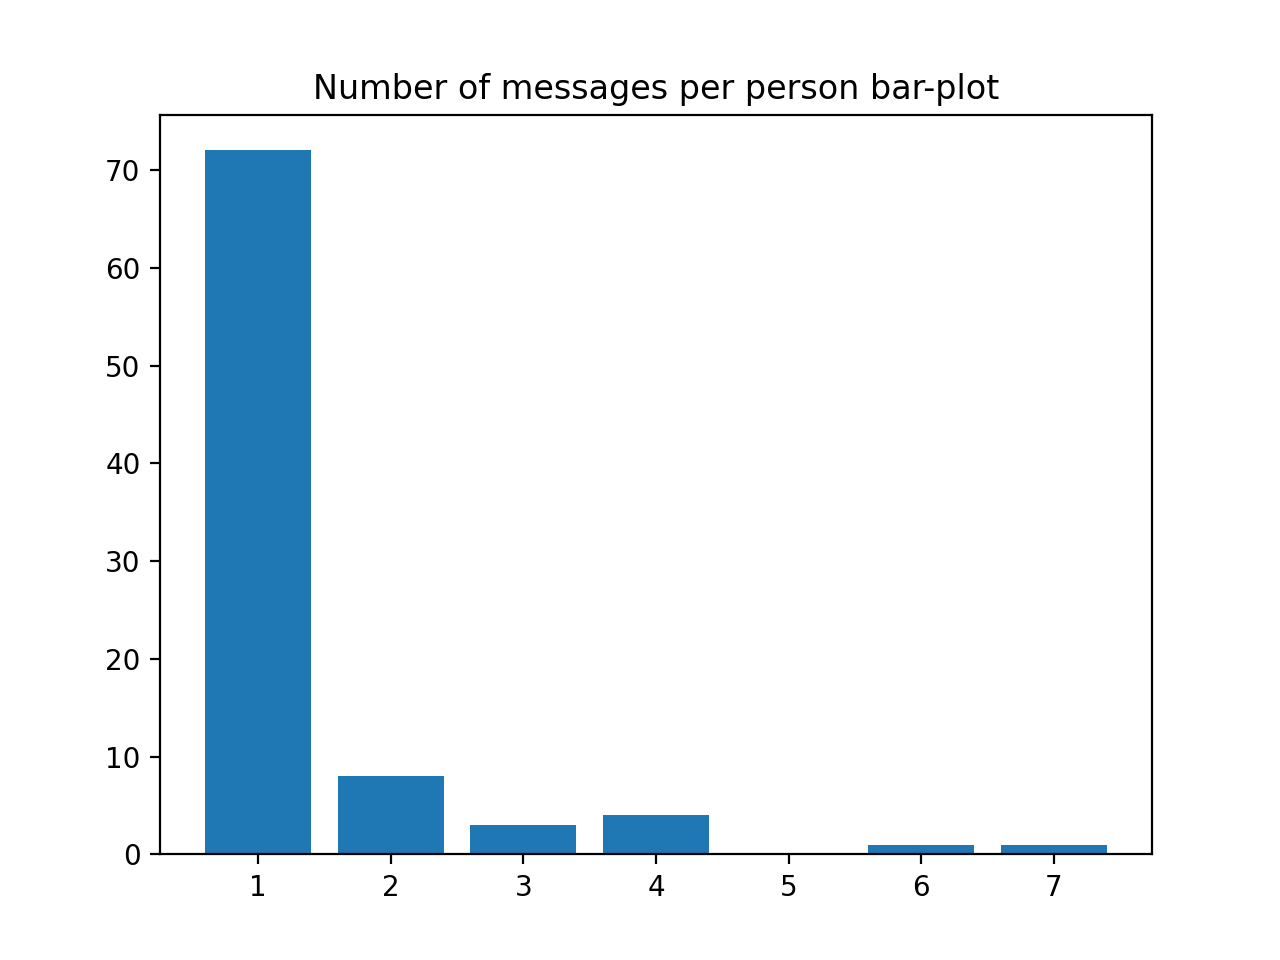

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook


print("Some stats:")
n_events = len(gaen)
n_humans_total = int(Path(filename).name.split("n_")[-1].split("_seed")[0])
n_humans_messages = len(set([u["name"] for u in gaen]))

risk_changes = np.array([u["risk_change_magnitude"] for u in gaen])
percentiles = np.array([u["percentile"] for u in gaen])

risk_change_stats = (risk_changes.mean(), risk_changes.std(), risk_changes.min(), risk_changes.max(), np.median(risk_changes))
percentiles_stats = (percentiles.mean(), percentiles.std(), percentiles.min(), percentiles.max(), np.median(percentiles))

messages_per_human = Counter([v for k, v in Counter([u["name"] for u in gaen]).items()])

############

default_str = "{:40}: {}"
stats_str = "{}\nmean {:.4f} | std {:.4f} | min {:.4f} | max {:.4f} | median {:.4f}"

############
print(default_str.format("Number of events", n_events))
print(default_str.format("Total number of individuals", n_humans_total))
print(default_str.format("Number humans sending messages", n_humans_messages))

fig = plt.figure()
plt.hist(risk_changes, bins=50)
plt.title(stats_str.format("Risk change magnitude histogram", *risk_change_stats))
plt.show()

fig = plt.figure()
plt.hist(percentiles, bins=50)
plt.title(stats_str.format("Percentile at time of messages histogram",*percentiles_stats))
plt.show()


plt.figure()
plt.bar(messages_per_human.keys(), messages_per_human.values())
plt.title("Number of messages per person bar-plot")
plt.show()

In [4]:
hgaen

defaultdict(list,
            {'human:17': [{'name': 'human:17',
               'risk_change_magnitude': 189,
               'percentile': 0.9856957087126138,
               'timestamp': datetime.datetime(2020, 3, 6, 0, 0),
               'daily_updates_sent': 1}],
             'human:18': [{'name': 'human:18',
               'risk_change_magnitude': 214,
               'percentile': 0.9935064935064936,
               'timestamp': datetime.datetime(2020, 3, 6, 0, 0),
               'daily_updates_sent': 2}],
             'human:91': [{'name': 'human:91',
               'risk_change_magnitude': 161,
               'percentile': 0.9577464788732394,
               'timestamp': datetime.datetime(2020, 3, 6, 0, 0),
               'daily_updates_sent': 3}],
             'human:100': [{'name': 'human:100',
               'risk_change_magnitude': 187,
               'percentile': 0.9821200510855683,
               'timestamp': datetime.datetime(2020, 3, 6, 0, 0),
               'daily_updates_

In [5]:
hragaen = defaultdict(list)
missing_ra = []
for h in hgaen:
    for u in hgaen[h]:
        r = [x for x in hra[h] if x["timestamp"] == u["timestamp"]]
        if r:
            assert len(r) == 1
            u = deepcopy(u)
            u.update(r[0])
            hragaen[h].append(u)
        else:
            missing_ra.append((h, u["timestamp"]))
            
print(len(hragaen))
print("Missing in RA (from GAEN):", missing_ra)
print("Max RA date:", max([r["timestamp"] for r in ra]))
print("Max gaen date:", max([r["timestamp"] for r in gaen]))

89
Missing in RA (from GAEN): [('human:5', datetime.datetime(2020, 3, 19, 3, 0)), ('human:8', datetime.datetime(2020, 3, 19, 3, 0))]
Max RA date: 2020-03-20 23:00:00
Max gaen date: 2020-03-20 23:00:00


In [6]:
hragaen

defaultdict(list,
            {'human:17': [{'name': 'human:17',
               'risk_change_magnitude': 189,
               'percentile': 0.9856957087126138,
               'timestamp': datetime.datetime(2020, 3, 6, 0, 0),
               'daily_updates_sent': 1,
               'risk': 0.005025185,
               'risk_level': 1,
               'rec_level': 0,
               'exposed': False,
               'infectious': False,
               'symptoms': 0,
               'test': None,
               'recovered': False,
               'test_recommended': False,
               'order_1_is_exposed': False,
               'order_1_is_presymptomatic': True,
               'order_1_is_infectious': True,
               'order_1_is_symptomatic': False,
               'order_1_is_tested': False}],
             'human:18': [{'name': 'human:18',
               'risk_change_magnitude': 214,
               'percentile': 0.9935064935064936,
               'timestamp': datetime.datetime(2020, 3, 6, 

<IPython.core.display.Javascript object>


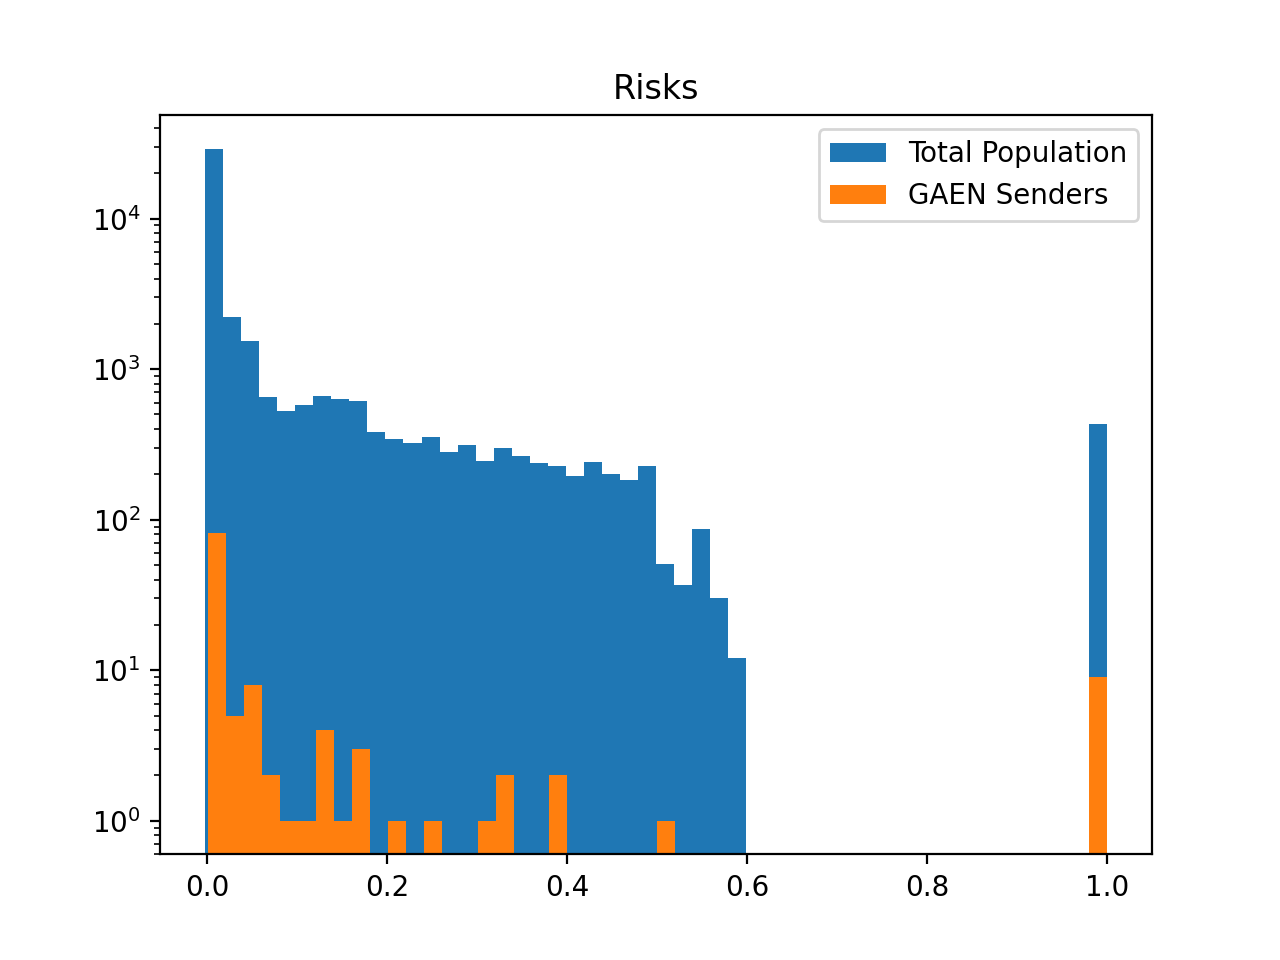

In [12]:
bins = 50

label1 = "Total Population"
risks1 = np.array([r["risk"] for h, v in hra.items() for r in v])
risk_level1 = [r["risk_level"] for h, v in hra.items() for r in v]
rec_level1 = [r["rec_level"] for h, v in hra.items() for r in v]
symptoms1 = [r["symptoms"] for h, v in hra.items() for r in v]

label2 = "GAEN Senders"
risks2 = [r["risk"] for h, v in hragaen.items() for r in v]
risk_level2 = [r["risk_level"] for h, v in hragaen.items() for r in v]
rec_level2 = [r["rec_level"] for h, v in hragaen.items() for r in v]
symptoms2 = [r["symptoms"] for h, v in hragaen.items() for r in v]

plt.figure()
plt.hist(risks1, label=label1, bins=bins)
plt.hist(risks2, label=label2, bins=bins)
plt.title("Risks")
plt.yscale("log")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


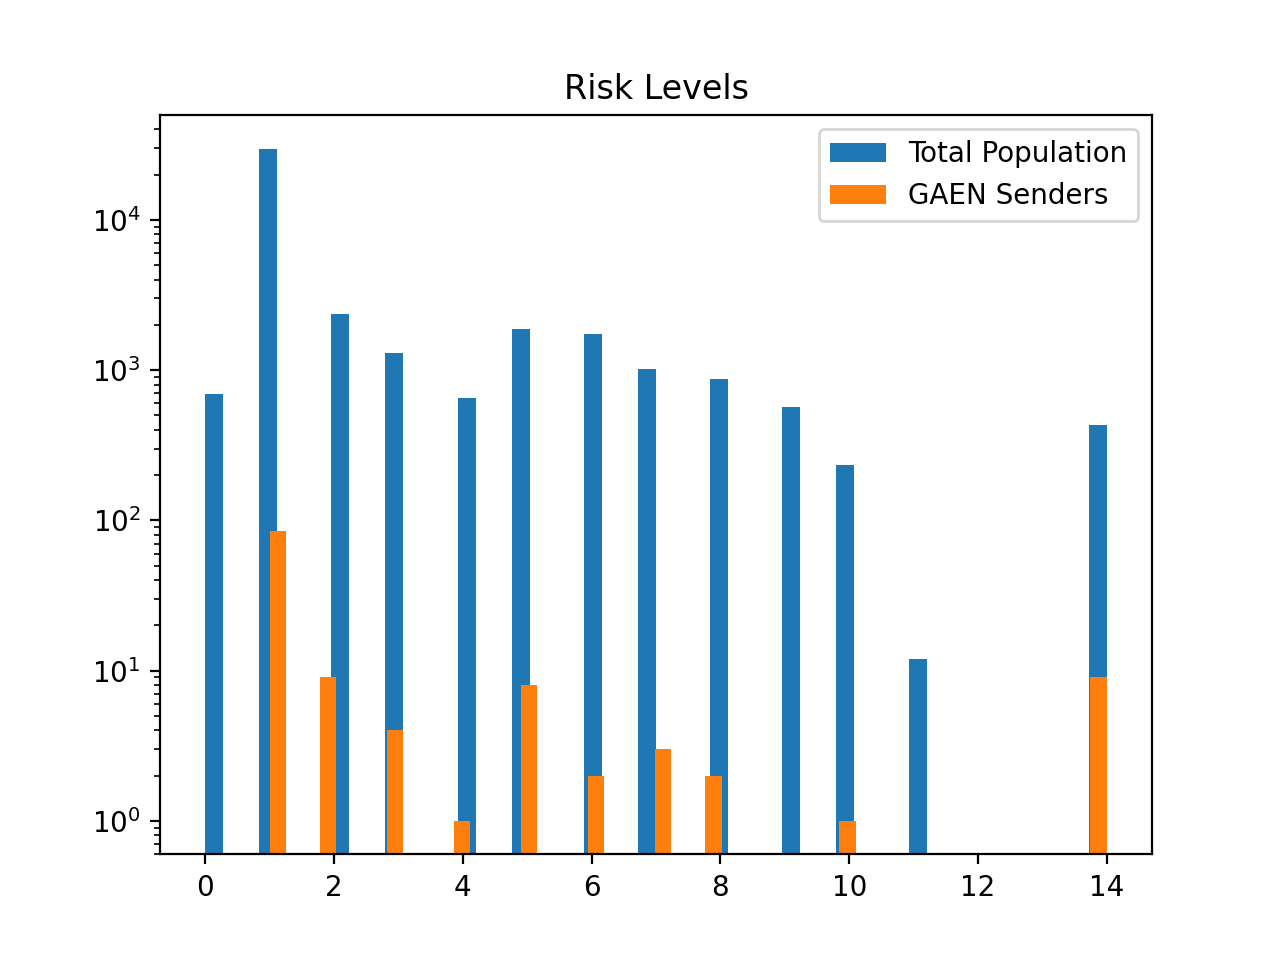

In [13]:
plt.figure()
plt.hist(risk_level1, label=label1, bins=bins)
plt.hist(risk_level2, label=label2, bins=bins)
plt.title("Risk Levels")
plt.yscale("log")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


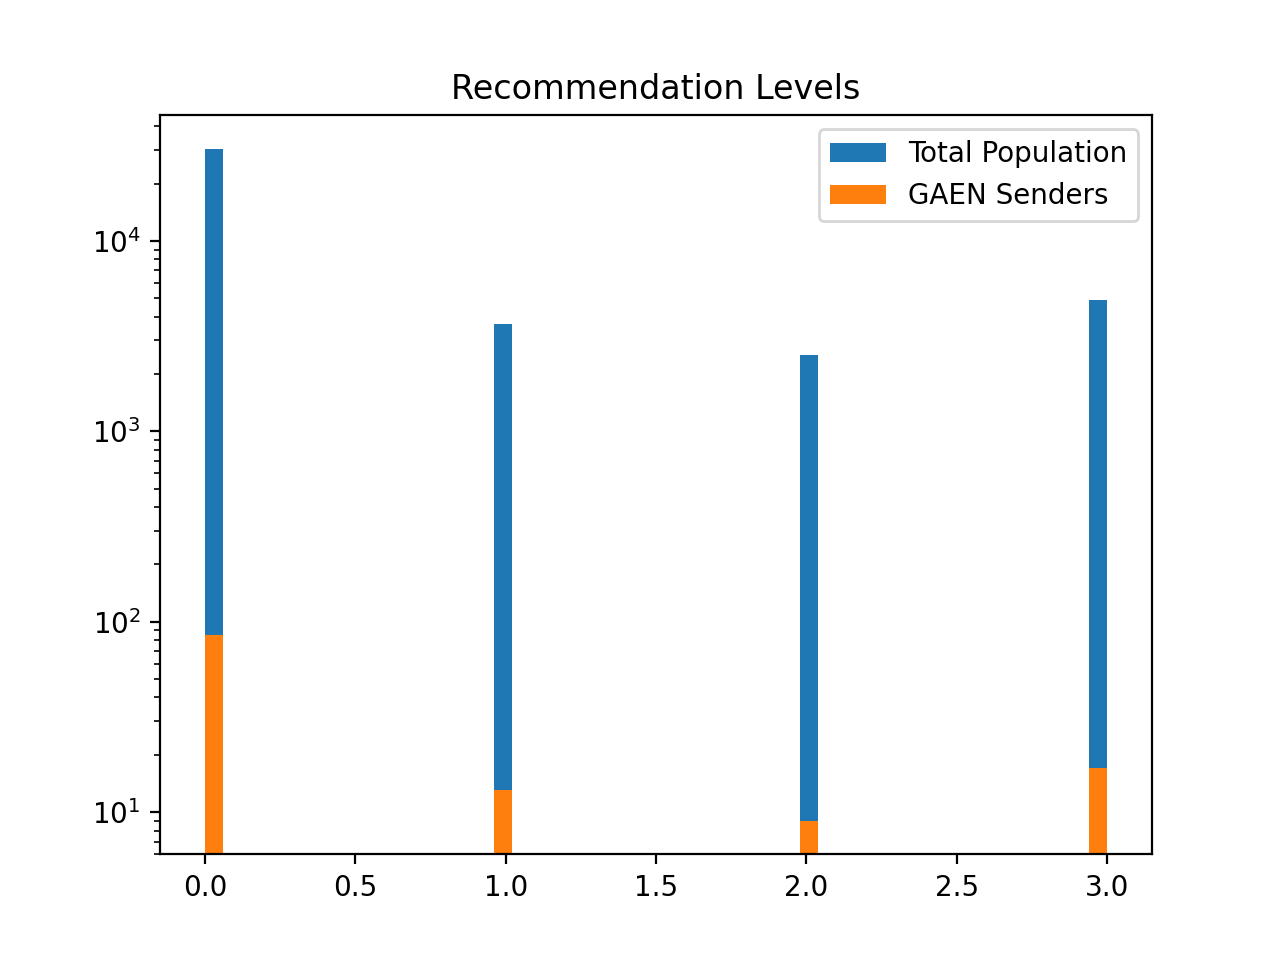

In [14]:
plt.figure()
plt.hist(rec_level1, label=label1, bins=bins)
plt.hist(rec_level2, label=label2, bins=bins)
plt.title("Recommendation Levels")
plt.yscale("log")
plt.legend()
plt.show()